In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('/kaggle/input/latest-air-quality-index-analysis/26th_December_2023_Air_Quality_Dataset.csv')

In [4]:
df

,id,country,state,city,station,station_code,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,0,India,Andhra_Pradesh,A0ntapur,Gulzarpet,APPCB,26-12-2023 22:00,14.675886,77.593027,SO2,0,0,0
1,1,India,Andhra_Pradesh,Chittoor,Gangineni Cheruvu,APPCB,26-12-2023 22:00,13.204880,79.097889,SO2,7,32,12
2,2,India,Andhra_Pradesh,Tirupati,Tirumala,APPCB,26-12-2023 22:00,13.670000,79.350000,NH3,2,5,3
3,3,India,Andhra_Pradesh,Tirupati,Tirumala,APPCB,26-12-2023 22:00,13.670000,79.350000,CO,40,64,47
4,4,India,Andhra_Pradesh,Tirupati,Tirumala,APPCB,26-12-2023 22:00,13.670000,79.350000,OZONE,9,50,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,3311,India,West_Bengal,Kolkata,Jadavpur,WBPCB,26-12-2023 22:00,22.499290,88.369170,PM10,80,202,125
3312,3312,India,West_Bengal,Kolkata,Rabindra Sarobar,WBPCB,26-12-2023 22:00,22.511060,88.351420,NH3,2,21,8
3313,3313,India,West_Bengal,Kolkata,Rabindra Sarobar,WBPCB,26-12-2023 22:00,22.511060,88.351420,SO2,7,63,23
3314,3314,India,West_Bengal,Kolkata,Rabindra Sarobar,WBPCB,26-12-2023 22:00,22.511060,88.351420,OZONE,3,90,45


In [5]:
df.describe()

,id,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000
mean,1657.500000,22.769742,78.545983,38.061218,110.646261,69.669481
std,957.391073,5.407461,4.882075,55.475655,126.634146,85.316767
min,0.000000,8.514909,70.909168,0.000000,0.000000,0.000000
25%,828.750000,19.065931,75.389600,4.000000,16.000000,10.000000
50%,1657.500000,23.264759,77.300590,16.000000,62.000000,36.000000
75%,2486.250000,27.194120,80.327067,47.000000,148.000000,90.000000
max,3315.000000,34.066206,94.636574,371.000000,500.000000,439.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3316 entries, 0 to 3315
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3316 non-null   int64  
 1   country        3316 non-null   object 
 2   state          3316 non-null   object 
 3   city           3316 non-null   object 
 4   station        3316 non-null   object 
 5   station_code   3316 non-null   object 
 6   last_update    3316 non-null   object 
 7   latitude       3316 non-null   float64
 8   longitude      3316 non-null   float64
 9   pollutant_id   3316 non-null   object 
 10  pollutant_min  3316 non-null   int64  
 11  pollutant_max  3316 non-null   int64  
 12  pollutant_avg  3316 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 336.9+ KB


In [7]:
df.groupby('state').value_counts()

state        id    country  city         station             station_code  last_update       latitude   longitude  pollutant_id  pollutant_min  pollutant_max  pollutant_avg
0galand      396   India    Kohima       PWD Juction          NPCB         26-12-2023 22:00  25.663541  94.098988  OZONE         9              12             10               1
             1061  India    Kohima       PWD Juction          NPCB         26-12-2023 22:00  25.663541  94.098988  NH3           0              0              0                1
             2382  India    Kohima       PWD Juction          NPCB         26-12-2023 22:00  25.663541  94.098988  PM2.5         19             127            48               1
             2383  India    Kohima       PWD Juction          NPCB         26-12-2023 22:00  25.663541  94.098988  PM10          18             103            46               1
             2384  India    Kohima       PWD Juction          NPCB         26-12-2023 22:00  25.663541  94.098988  

In [9]:
df.groupby('latitude').count()[['state']]

,state
latitude,
8.514909,7
8.563700,7
8.816428,5
8.878700,6
9.363990,7
...,...
30.943887,7
31.032545,4
31.321907,7


In [10]:
df.groupby('longitude').count()[['state']]

,state
longitude,
70.909168,7
71.393989,7
72.456691,7
72.515201,7
72.553024,7
...,...
93.679645,6
93.928622,5
93.942308,6


In [11]:
df.groupby('pollutant_id').count()[['state']]

,state
pollutant_id,
CO,479
NH3,436
NO2,487
OZONE,469
PM10,484
PM2.5,488
SO2,473


In [12]:
df.groupby('pollutant_max').count()[['pollutant_id']]

,pollutant_id
pollutant_max,
0,180
1,24
2,49
3,52
4,52
...,...
494,2
495,1
498,1


In [15]:
df[df['pollutant_id'] == df['pollutant_id'].max()]['pollutant_id']
df[df['pollutant_id']==df['pollutant_id'].min()]['pollutant_id']

3       CO
6       CO
8       CO
18      CO
24      CO
        ..
3296    CO
3300    CO
3303    CO
3306    CO
3307    CO
Name: pollutant_id, Length: 479, dtype: object

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


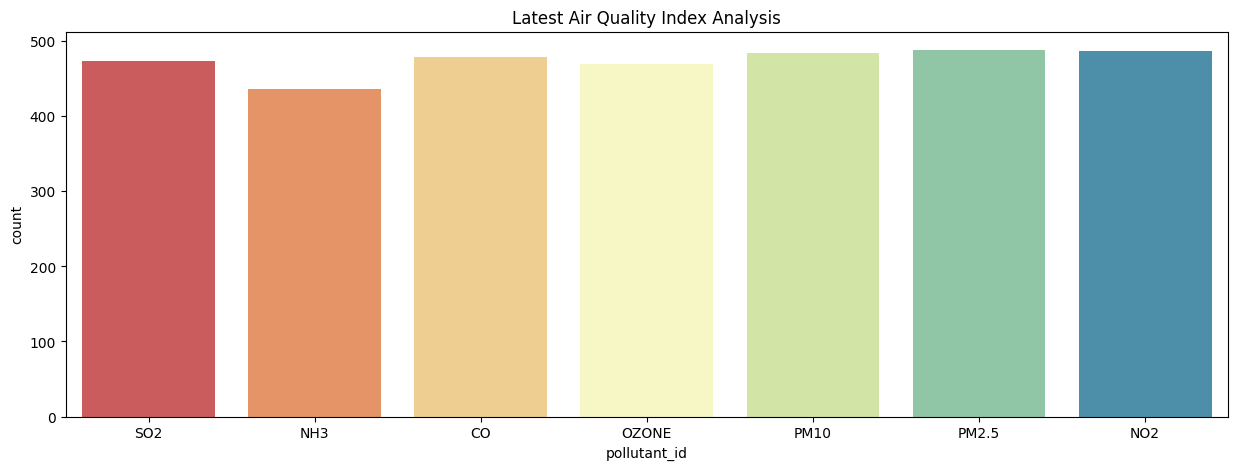

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="pollutant_id", palette="Spectral")
plt.title("Latest Air Quality Index Analysis")
plt.show()

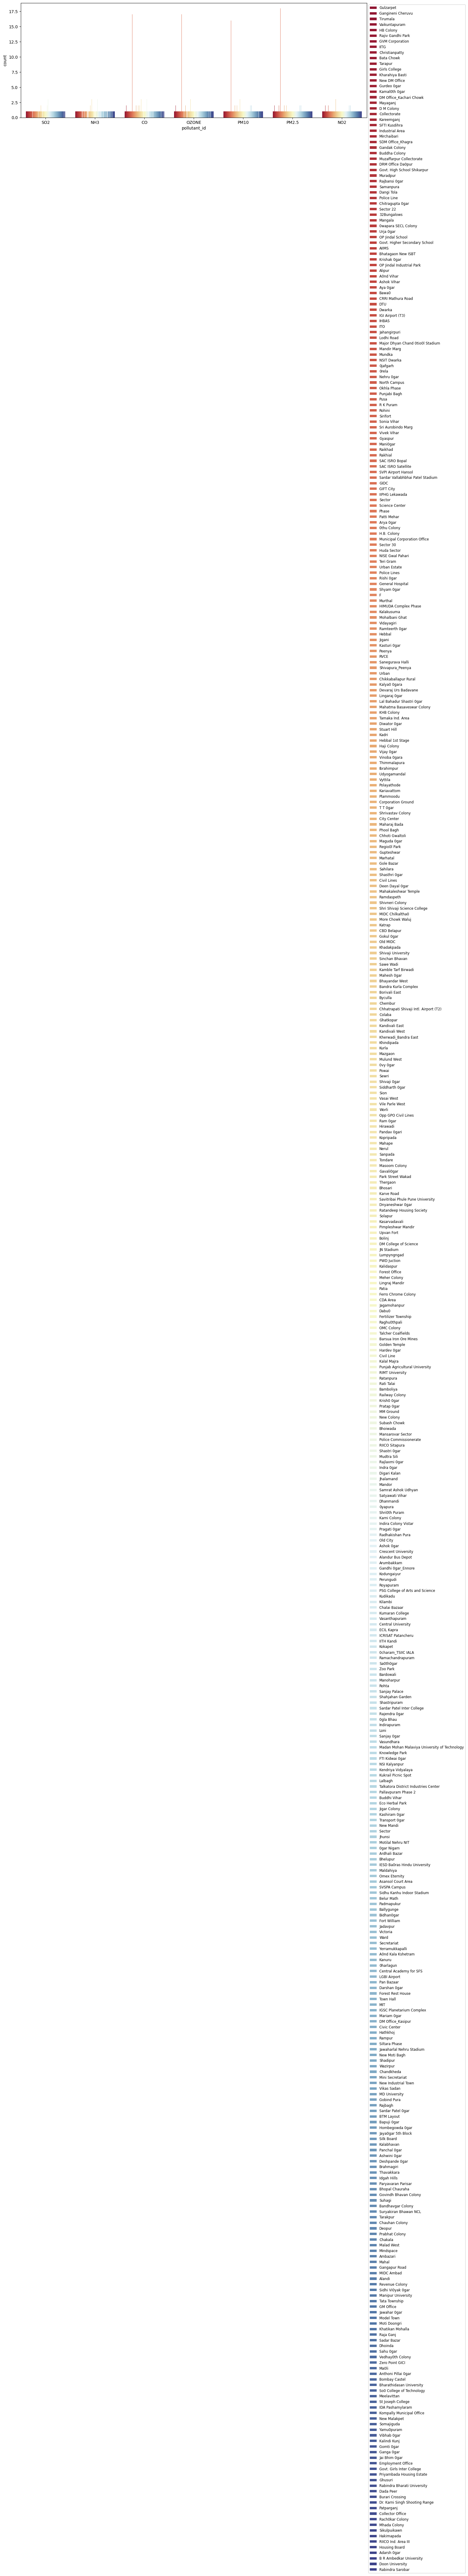

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="pollutant_id", palette="RdYlBu", hue="station")
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize='small')
plt.show()

In [27]:
frequency = {}
for row in df["pollutant_id"].str.split(","):
    for word in row:
        word = word.strip()
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
frequency_df = pd.DataFrame.from_dict([frequency]).T.sort_values(by=0, ascending=False).head(10)

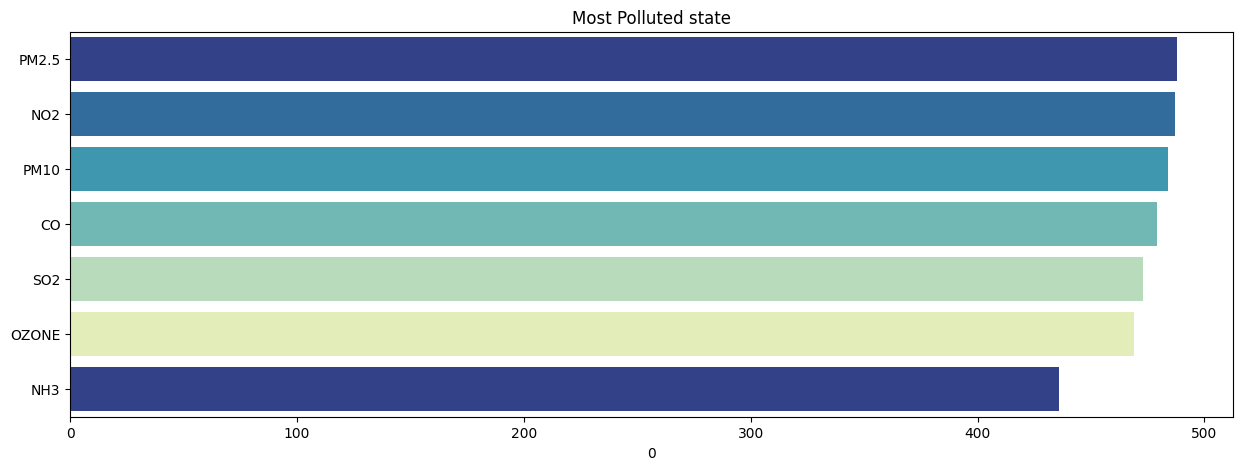

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(data = frequency_df, x=0, y=frequency_df.index, palette=sns.color_palette("YlGnBu_r"))
plt.title("Most Polluted state")
plt.show()